In [1]:
from DDPG import ddpg, ddpg_test
import tensorflow as tf
from utils import test_utils

Using Tensorflow  1.5.0


In [2]:
ddpg_test.ddpg_test()

[<tf.Variable 'Actor/network_kernel:0' shape=(128, 9) dtype=float32_ref>,
 <tf.Variable 'Actor/network_bias:0' shape=(9,) dtype=float32_ref>,
 <tf.Variable 'Actor/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]

[<tf.Variable 'ActorTarget/network_kernel:0' shape=(128, 9) dtype=float32_ref>,
 <tf.Variable 'ActorTarget/network_bias:0' shape=(9,) dtype=float32_ref>,
 <tf.Variable 'ActorTarget/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]

[<tf.Variable 'Critic/inputs_network_kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'Critic/actions_network_kernel:0' shape=(9, 1) dtype=float32_ref>,
 <tf.Variable 'Critic/network_bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'Critic/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]

[<tf.Variable 'CriticTarget/inputs_network_kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/actions_network_kernel:0' shape=(9, 1) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/network_bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'CriticTarget/BatchNorm/beta:0' shape=(128,) dtype=float32_ref>]




TESTING:	Actor



SSE: 0.00000000000	Action: True
SSE: 0.00000000000	Q: True
SSE: 0.00000000000	CriticGradients: True
SSE: 0.00000000007	ObjectiveGradients1: True
SSE: 0.00000000001	ObjectiveGradients2: True



TESTING:	TESTING: updating the model



SSE: 622223.06250000000	ActorParamsUpdate: True
SSE: 365221.68750000000	ActorParamsUpdate: True
SSE: 773298.06250000000	ActorParamsUpdate: True
SSE: 0.00000000000	ActorTargetParamsUpdate: True
SSE: 0.00000000000	ActorTargetParamsUpdate: True
SSE: 0.00000000000	ActorTargetParamsUpdate: True
SSE: 0.00000000001	ActorParamsUpdate: True
SSE: 0.00000000000	ActorParamsUpdate: True
SSE: 0.00000000000	ActorParamsUpdate: True



TESTING:	Critic



SSE: 0.00000000000	Action: True
SSE: 0.00000000000	NextAction: True
SSE: 0.00000000000	Q: True
SSE: 0.00000000000	NextQ: True
SSE: 0.00000000000	TDTarget: True
SSE: 0.00000000000	CriticLoss: True



TESTING:	TESTING: updating the model



SSE: 20695.78710937500	CriticParamsUpdate: True
SSE: 2484.0610351

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from utils.test_utils import *

num_units = 128

T1 = np.random.normal(loc=np.ones([num_units]) * 150, scale=5)
T2 = np.random.normal(loc=np.ones([num_units]) * -150, scale=5)
T1_train = np.random.normal(loc=T1, scale=100)
T2_train = np.random.normal(loc=T2, scale=100)
mask = np.tanh(np.random.normal(size=num_units))
T1_val = np.random.normal(loc=((1-mask) * T1_train + mask * T2_train), scale=10)
T2_val = np.random.normal(loc=(mask * T1_train + (1-mask) * T2_train), scale=10)

In [2]:
np.round(mask, decimals=2)

array([ 0.06,  0.7 ,  0.47,  0.93,  0.01, -0.46,  0.17, -0.82, -0.69,
       -0.98, -0.99,  0.42, -0.6 , -0.81,  0.04, -0.93,  0.79,  0.8 ,
        0.98, -0.99, -0.48,  0.83, -0.63,  0.04, -0.42,  0.92, -0.33,
       -0.82,  0.58, -0.87,  0.93,  0.58,  0.37, -0.68, -0.89,  0.67,
       -0.36,  0.42,  0.33, -0.6 , -0.92, -0.96, -0.32, -0.29,  0.41,
        0.65, -0.86,  0.76, -0.33,  0.91, -0.11,  0.26, -0.74, -0.81,
       -0.19, -0.92, -0.19,  0.68, -0.8 , -0.  , -0.94, -0.41,  0.24,
       -0.5 , -0.15, -0.48, -0.24, -0.3 ,  0.82, -0.  , -0.75,  0.8 ,
       -0.96,  0.7 , -0.53, -0.03, -0.87, -0.99,  0.01,  0.86, -0.71,
       -0.9 , -0.08, -0.03,  0.85, -0.22, -0.91,  0.58, -0.07, -0.39,
       -0.53, -0.57, -0.94, -0.42, -0.56, -0.86, -0.63,  0.11, -0.57,
       -0.89, -0.45,  0.17,  0.81,  0.74,  0.92,  0.69,  0.77, -0.59,
       -0.71,  0.45, -0.29,  0.58,  0.77, -0.98, -0.65, -0.12,  0.39,
       -0.96, -0.79,  0.2 , -0.95, -0.95, -0.81,  0.66, -0.22, -0.19,
        0.15, -0.97]

In [3]:
P1 = Point(params=T1,
           params_train=T1_train,
           params_val=T1_val)

P2 = Point(params=T2,
           params_train=T2_train,
           params_val=T2_val)

env = Environment(P1, P2, 0.005)
# env.visualize()

In [ ]:
%matplotlib inline
# sharing both params
all_shared_best_vals = []
last_P1_train_loss = -1
last_P2_train_loss = -1
for log_coef in np.arange(-5, 5):
    env = Environment(P1, P2, 0.005)
    for time in range(1000):
        coefs = np.ones([num_units]) * np.exp(log_coef)
        P1_train_loss, P1_val_loss, state = env.update_P1(coefs)
        P2_train_loss, P2_val_loss, state = env.update_P2(coefs)
        
        if np.abs(P1_train_loss - last_P1_train_loss) < 1e-3:
            print("P1 Done")
            break
        if np.abs(P2_train_loss - last_P2_train_loss) < 1e-3:
            print("P2 Done")
            break
        last_P1_train_loss = P1_train_loss
        last_P2_train_loss = P2_train_loss
    
    # print("Final Val Loss \tP1: %.2f \tP2: %.2f" % (P1_val_loss, P2_val_loss))
    all_shared_best_vals.append(env.best_P2_valid_loss)
    # env.visualize()

In [ ]:
%matplotlib inline
from bandits import MultiArmedBanditSelector
selector = MultiArmedBanditSelector(
    num_actions=num_units, Q_initial=-5)
# initial task
task, _ = selector.sample()

selector_best_vals = []
last_P1_train_loss = -1
last_P2_train_loss = -1
for log_coef in np.arange(-5, 5):
    env = Environment(P1, P2, 0.005)
    for step in range(3000):
        coefs = (np.eye(num_units) * np.exp(log_coef))[task]
        
        P1_train_loss, P1_val_loss, state = env.update_P1(coefs)
        P2_train_loss, P2_val_loss, state = env.update_P2(coefs)
        
        if np.abs(P1_train_loss - last_P1_train_loss) < 1e-3:
            print("P1 Done")
            break
        # if np.abs(P2_train_loss - last_P2_train_loss) < 1e-3:
        #     print("P2 Done")
        #     break
        last_P1_train_loss = P1_train_loss
        last_P2_train_loss = P2_train_loss
        
        selector.update_Q_values(new_Q_value=-P1_val_loss/50000., index=task)
        
        
        task, _ = selector.sample(step=step)
    
    # print("Final Val Loss \tP1: %.2f \tP2: %.2f" % (P1_val_loss, P2_val_loss))
    # env.visualize()
    selector_best_vals.append(env.best_P1_valid_loss)

In [192]:
selector._Q_values

[Q_Entry(Value=-57.768156783453925, Count=203),
 Q_Entry(Value=-57.563802901108595, Count=218),
 Q_Entry(Value=-57.64388458833646, Count=235),
 Q_Entry(Value=-57.4184692823126, Count=225),
 Q_Entry(Value=-57.434968435843714, Count=249),
 Q_Entry(Value=-57.17446812940016, Count=236),
 Q_Entry(Value=-57.388384714679, Count=288),
 Q_Entry(Value=-57.63996281799298, Count=268),
 Q_Entry(Value=-57.539934554095005, Count=237),
 Q_Entry(Value=-57.54627099595901, Count=237),
 Q_Entry(Value=-57.34246234554226, Count=204),
 Q_Entry(Value=-57.439619001065786, Count=261),
 Q_Entry(Value=-57.322476680083554, Count=306),
 Q_Entry(Value=-57.587316176774124, Count=189),
 Q_Entry(Value=-57.52108755784493, Count=219),
 Q_Entry(Value=-57.464078505736715, Count=228),
 Q_Entry(Value=-57.61848715687593, Count=221),
 Q_Entry(Value=-57.81802694302526, Count=206),
 Q_Entry(Value=-57.5960360451981, Count=214),
 Q_Entry(Value=-57.83210708500212, Count=253),
 Q_Entry(Value=-57.77320148100019, Count=226),
 Q_Entry(

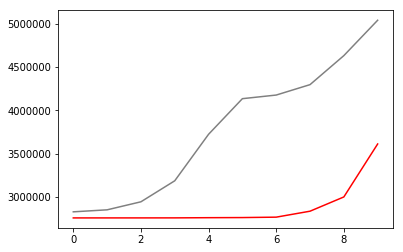

In [6]:
plt.plot(all_shared_best_vals, "grey")
plt.plot(selector_best_vals, c="red")

In [3]:
from DDPG.ddpg import SingleEpisodeDDPGController
from utils.test_utils import *

num_units = 5
num_actions = 3

T1 = np.random.normal(loc=np.ones([num_actions, num_units]) * 150, scale=5)
T2 = np.random.normal(loc=np.ones([num_actions, num_units]) * -150, scale=5)
T1_train = np.random.normal(loc=T1, scale=100)
T2_train = np.random.normal(loc=T2, scale=100)
mask = np.tanh(-np.random.normal(size=[num_actions, 1]))

T1_val = np.random.normal(loc=((1-mask) * T1_train + mask * T2_train), scale=10)
T2_val = np.random.normal(loc=(mask * T1_train + (1-mask) * T2_train), scale=10)

P1 = Point(params=T1,
           params_train=T1_train,
           params_val=T1_val)

P2 = Point(params=T2,
           params_train=T2_train,
           params_val=T2_val)

env = Environment(P1, P2, 0.005)

In [4]:
mask

array([[ 0.52858242],
       [ 0.02648973],
       [-0.45135727]])

In [5]:
from DDPG.ddpg import SingleEpisodeDDPGController
sess = tf.Session()
selector = SingleEpisodeDDPGController(
    sess=sess,
    num_units=num_units * num_actions * 3,  # [A, B, A-B]
    num_actions=num_actions,
    batch_size=64,
    learning_rate=0.01,
    tau=0.001,
    gamma=0.99,
    actor_activation=tf.nn.tanh,
    critic_activation=None,
    opitmizer_name="sgd",
    max_gradient_norm=1.0,
    actor_scope="Actor",
    critic_scope="Critic",
    actor_target_scope="ActorTarget",
    critic_target_scope="CriticTarget")

In [6]:
def state_processing(state):
    # length 3 of [num_actions, num_units]
    # [num_actions, 3 x num_units]
    processed_state = np.concatenate(state, axis=-1)
    # [1, num_actions x 3 x num_units]
    processed_state = np.reshape(processed_state, [1, -1])
    return processed_state
def action_processing(action):
    # [batch, num_actions] where batch=1
    # to [num_actions, 1]
    action = np.squeeze(action)
    action = np.expand_dims(action, axis=-1)
    return action


initial_state = state_processing(env.state())
display(initial_state.shape)
action = selector.act(initial_state)
action = action_processing(action)
display(action)

(1, 45)

array([[ 0.76101619],
       [-0.65666903],
       [-0.09409291]])

In [7]:
selector_best_vals = []
rewards_history = []
actions_history = []
for step in range(3000):
    # print(step)
    coefs = action_processing(action)
    P1_train_loss, P1_val_loss, _ = env.update_P1(coefs)
    P2_train_loss, P2_val_loss, _ = env.update_P2(coefs)
    
    
    new_state=state_processing(env.state())
    observed_reward = -np.log(P1_val_loss)
    action, debug = selector.update(
        new_state=new_state, observed_reward=observed_reward)
    
    rewards_history.append(observed_reward)
    actions_history.append(action)
    print(P1_val_loss)

16062.644408541257
15778.52204167744
15504.808468136593
15242.160548891245
14989.203931434582
14742.635392513335
14512.805240603331
14298.364026043047
14086.274009526513
13886.093803404025
13695.299548506795
13510.774443222288
13327.169756189549
13148.790466562557
12976.603482919325
12822.016863727766
12671.183692453018
12530.779153361462
12395.15322723697
12267.092218445388
12143.253678232802
12025.604399916218
11918.540951273677
11820.946805896545
11728.476973019171
11643.414679453495
11567.279956267153
11498.88733597622
11434.685115510465
11367.976406527763
11310.62080645766
11260.310652490414
11213.922219640233
11169.449132557851
11128.358611271377
11090.122206750959
11063.424837694323
11050.508429241578
11033.09653965512
11019.176549217338
11013.517859782945
11018.321674925977
11024.129617779276
11043.551366652558
11054.016355202208
11077.610162491615
11101.997619966805
11137.260908713712
11186.962163821388
11248.825324763067
11328.299704175888
11411.450034530679
11506.89756862201

/Users/AlexGuo/Documents/Documents/UNC/DLResearches/TF-RLLibs/DDPG/ddpg.py:143: UserWarning: This Code Assumes No Termination of Episodes
  warnings.warn("This Code Assumes No Termination of Episodes")


28880.409121083838
29895.790158570013
30937.986575128223
32051.247964300226
33225.958076057745
34484.44247925089
35842.94810416461
37313.67878138305
38900.17973738339
40639.670100156036
42383.49701207329
44214.623285273105
46192.29808050081
48228.04320923498
50274.09191611987
52416.300431077594
54643.08872908005
57058.13999007918
59489.94509300458
62105.28173849684
64740.64572076488
67656.65999450063
70694.58843621874
74008.59369419559
77469.54339613736
80993.2891782859
84675.44458602015
88307.56455043265
92139.70689507255
96190.47138202729
100555.20960325318
105244.84177061457
109927.09267985106
114728.98079743942
119685.64579537972
124822.31949197166
130183.1535377749
135625.29491909037
141314.69365631483
146925.2432233819
152808.2412288829
158969.18893027148
165513.51411203312
172240.60649256172
179319.9340242901
186669.39970142575
194492.82052037225
202436.30146244456
210626.60258319826
218862.5159722039
227457.7566766845
236800.40021003046
246306.86648854424
255861.48388599366
265

54734704860204.66
55265512640150.92
55788022746921.305
56229714002398.805
56614327937886.055
56977385164603.9
57272660251957.21
57507032009581.26
57721719414188.96
58029730024339.36
58450769297201.14
58842480050815.26
59105819366575.17
59284042789787.84
59657815712109.484
60026930988696.086
60292562083905.37
60457723902361.016
60531975341146.15
60526692505912.49
60433128233975.73
60296565990205.87
60037109006071.555
59728501704777.79
59416539191728.984
59035617938799.15
58674890867273.87
58257986684943.63
57810163788385.914
57318947506888.85
56913652600627.26
56528660365002.164
56271777286607.47
55931002061590.336
55600449846681.17
55283786135580.414
54912418789298.16
54647563398347.95
54447424087026.164
54131619507570.15
53800375890567.24
53461694324293.79
53039718052982.336
52584827504710.99
52123660422730.68
51781907131377.99
51412769868184.516
51111920936874.0
50807207606890.05
50589706345744.625
50351687851662.66
50190539404602.766
49972124708506.08
49784150991466.49
4949922706275

5.478237495112209e+22
5.742636174924089e+22
6.017015407793154e+22
6.297978315404072e+22
6.576315573165854e+22
6.863250341414564e+22
7.166240217860581e+22
7.484713620033661e+22
7.8207135728744e+22
8.16170057031722e+22
8.513627332574836e+22
8.871408718809651e+22
9.255012653794282e+22
9.639382061325812e+22
1.0048149020195478e+23
1.0488291796203705e+23
1.0930660414393348e+23
1.1375967963216717e+23
1.1827113928651721e+23
1.227034913619348e+23
1.2722319482634208e+23
1.3214086140974878e+23
1.3720593133364439e+23
1.4254957312379615e+23
1.482200703599675e+23
1.539879641602891e+23
1.5968179779428413e+23
1.6557158737634365e+23
1.7154402257672703e+23
1.7757523333178346e+23
1.8428483753004586e+23
1.913543070272992e+23
1.9869350894495486e+23
2.060706220768239e+23
2.1357621997560733e+23
2.217747567869096e+23
2.3047167985093598e+23
2.3924551499344264e+23
2.4852724402572254e+23
2.579264640812311e+23
2.678152597936023e+23
2.7854769953342178e+23
2.9035141191024114e+23
3.023549463514129e+23
3.143562207210

2.8750206471628596e+25
2.8692594877153505e+25
2.8610164722212957e+25
2.84923351955044e+25
2.8375349834548735e+25
2.8293583926561556e+25
2.8270776016522027e+25
2.829814973310357e+25
2.8325316389777624e+25
2.834776545631118e+25
2.838067589320171e+25
2.841144845363213e+25
2.843437059300399e+25
2.8480637430192e+25
2.8574808522939674e+25
2.8643468615502654e+25
2.8707541090950295e+25
2.8835832503243325e+25
2.891292419259007e+25
2.8942614235108197e+25
2.888480689435793e+25
2.8834785559014715e+25
2.8799150763688184e+25
2.873678047181517e+25
2.865365524594958e+25
2.8594944575942674e+25
2.85795951257973e+25
2.85965525253679e+25
2.8612101826140185e+25
2.8627791991390095e+25
2.8621198898210367e+25
2.8610940327150005e+25
2.8600812099181243e+25
2.8577305607843933e+25
2.8579875138856244e+25
2.857956306045287e+25
2.8570015594067957e+25
2.855770672508582e+25
2.8548107618353742e+25
2.857919969646648e+25
2.8595375619307646e+25
2.866527633959969e+25
2.8724946506824108e+25
2.8773343445007948e+25
2.88321301

2.6848417545486864e+25
2.6863435898311586e+25
2.689015170706577e+25
2.6912675114460136e+25
2.692659266115574e+25
2.693432243534869e+25
2.6865320695067984e+25
2.682510075580045e+25
2.678607973198697e+25
2.675821616803105e+25
2.6746244537174645e+25
2.676808042067474e+25
2.680670555139779e+25
2.685251680188055e+25
2.6904758740431303e+25
2.701777639990275e+25
2.7065108823189628e+25
2.706451850445198e+25
2.7112571973611367e+25
2.7218148733011325e+25
2.737356096462389e+25
2.7557761275770496e+25
2.7712648741792543e+25
2.7834465325708547e+25
2.7954389533029468e+25
2.8119771465187937e+25
2.831370233358118e+25
2.8507268059230594e+25
2.874461955919838e+25
2.899302527338016e+25
2.9293566510408183e+25
2.9596299326472404e+25
2.984898415467917e+25
3.0107584803809925e+25
3.041076120850253e+25
3.075738461296451e+25
3.1096404253348945e+25
3.1424304432827043e+25
3.168437082077277e+25
3.1888640918873575e+25
3.2134174072511317e+25
3.2390312354914883e+25
3.266909450766672e+25
3.288259887702815e+25
3.3094571

2.1914247796875123e+27
2.2370173663219115e+27
2.2847052690737604e+27
2.3354637638688377e+27
2.3898784729107137e+27
2.448915342003582e+27
2.5093487334035067e+27
2.5696014086913966e+27
2.6237962240927254e+27
2.6786532127552377e+27
2.7387198906796237e+27
2.7990710827437305e+27
2.861829568958894e+27
2.9274207226291754e+27
2.9954877035896507e+27
3.06791090919952e+27
3.1357025494493056e+27
3.208070649092976e+27
3.2765672156160134e+27
3.345795538017726e+27
3.418182008557578e+27
3.495762139487994e+27
3.5804289289304654e+27
3.6645513687577997e+27
3.750322905819902e+27
3.83166155418242e+27
3.9185600446250454e+27
4.009322539301091e+27
4.099401871569362e+27
4.1853917920184227e+27
4.2682913155030126e+27
4.358188529374173e+27
4.451045174493885e+27
4.5310390391525415e+27
4.608462840438004e+27
4.6942173602379085e+27
4.7824484349152586e+27
4.870425800769237e+27
4.953226810225209e+27
5.039433807094326e+27
5.122430135426036e+27
5.203816007378304e+27
5.291229286600298e+27
5.376348713292857e+27
5.455674064

7.092303622286674e+19
7.552949453464597e+19
8.016501613755451e+19
8.470414056465945e+19
8.9347247503286e+19
9.369952137717732e+19
9.80051891208292e+19
1.023749931499463e+20
1.0656901376878033e+20
1.1062789438872725e+20
1.1441354732728905e+20
1.1805481798021766e+20
1.2163734284810253e+20
1.2499620632297362e+20
1.2795714790541492e+20
1.3058181864285073e+20
1.328762276512586e+20
1.3529021393457907e+20
1.3758255107463963e+20
1.3993655205181963e+20
1.4184022611039896e+20
1.4362114330620541e+20
1.4512462687299812e+20
1.4644573125082513e+20
1.4771180979861746e+20
1.4897310980950036e+20
1.4997013922788363e+20
1.508488769099774e+20
1.515817633467928e+20
1.5210788613937532e+20
1.5251319292042353e+20
1.5270086969607045e+20
1.528796941260652e+20
1.530539320392813e+20
1.5303272380553612e+20
1.5281808068233806e+20
1.525694138868029e+20
1.52238798503356e+20
1.5197064249470707e+20
1.5161527015773104e+20
1.512847350914483e+20
1.50766556699359e+20
1.5013206745619064e+20
1.4939742955433712e+20
1.48729444

9.026799982826045e+19
9.299639660877934e+19
9.584205649934284e+19
9.882082595998838e+19
1.0196935463973185e+20
1.0535916698596549e+20
1.087794756928223e+20
1.1228872478742535e+20
1.1566295696668466e+20
1.1893078676809664e+20
1.2226844437643682e+20
1.2583997055023165e+20
1.2985102284824843e+20
1.3411285788557536e+20
1.3825555629576603e+20
1.4253016947653465e+20
1.4697252020725939e+20
1.5199246607829795e+20
1.5702480077302625e+20
1.6239992497166028e+20
1.6806339312546857e+20
1.73531870793474e+20
1.7870952138121324e+20
1.8398019017640608e+20
1.895809360770537e+20
1.9519518451687765e+20
2.009071619258748e+20
2.0664059708572185e+20
2.128874315847731e+20
2.1930802919707515e+20
2.2651470379220884e+20
2.3389835061213793e+20
2.4145134292551873e+20
2.4937830525100812e+20
2.5766705291939935e+20
2.6651249026845386e+20
2.756708723244207e+20
2.8525750854969993e+20
2.952782925771879e+20
3.055277396194073e+20
3.157299820758376e+20
3.2610465818638746e+20
3.374488058230809e+20
3.4926834531315266e+20
3.6

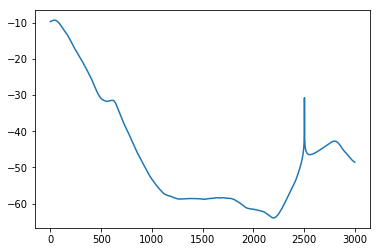

In [8]:
%matplotlib inline
plt.plot(rewards_history)

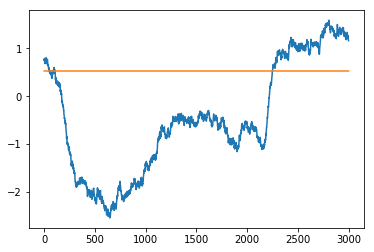

In [9]:
plt.plot(np.array(actions_history)[:,0, 0])
plt.plot(range(len(actions_history)), np.tile(mask[0], 3000))

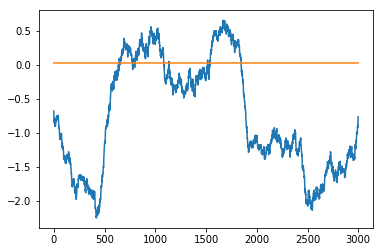

In [10]:
plt.plot(np.array(actions_history)[:,0, 1])
plt.plot(range(len(actions_history)), np.tile(mask[1], 3000))

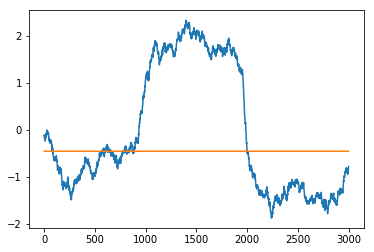

In [11]:
plt.plot(np.array(actions_history)[:,0, 2])
plt.plot(range(len(actions_history)), np.tile(mask[2], 3000))